In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

# Convolutional Neural Networks
When thinking about convolution the first thing that comes to my mind as someone with a background in stochastics is taking the sum of random variables.
An easy example would be to consider two fair six sided dice and look at the distribution of the sum of those.
Let therefore $X$ and $Y$ be two independent random variables which represent the two dice, i.e.
$\mathbb{P}(X = i) = \mathbb{P}(Y = i) = \frac{1}{6}$ for all $i=1,...,6$. Then both, $X$ and $Y$ have a discrete uniform distribution.

## Convolution of images with kernes from scratch

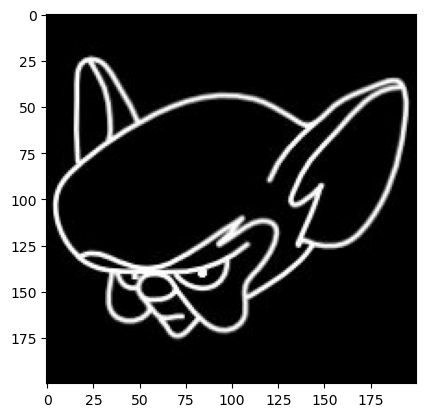

In [2]:
img = ((255 - plt.imread('Brain.jpg'))/255)[:,:,0]
plt.imshow(img,cmap='gray')

C:\Users\lachlinu\AppData\Local\Temp\ipykernel_2564\2855347397.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\torch\csrc\utils\tensor_new.cpp:204.)
  t_img = torch.tensor([[img]]).type(torch.float)


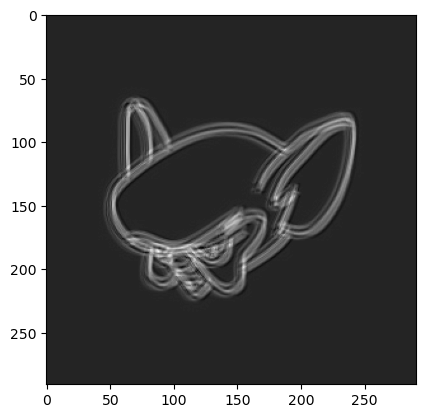

In [3]:
n = 10
conv = nn.Conv2d(in_channels= 1, out_channels= 1, kernel_size= n,padding= 50)
t_img = torch.tensor([[img]]).type(torch.float)
z = conv(t_img)
plt.imshow(z[0,0,:,:].detach().numpy(),cmap = 'gray')

In [4]:
print(torch.zeros(1,1,5,5).shape)
print(torch.tensor([[img]]).shape)
print(torch.max(t_img))


torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 200, 200])
tensor(1.)


In [5]:
test = torch.zeros(1,1,4,4)
test[:,:,:,-1] = 1
test[:,:,-1,1] = 1

kern = torch.tensor([[[[1,1],
                       [1,1]]]])
res = conv2d(test,kern,2)
print(test,"\n", kern,"\n", res)
plt.figure()
f,axs = plt.subplots(1,2)
axs[0].imshow(test[0,0,:,:],cmap='gray')
axs[1].imshow(res[0,0,:,:], cmap = 'gray')


NameError: name 'conv2d' is not defined

In [ ]:
print(test[0,0,:,:],'\n',kern)

In [ ]:
def conv2d(img, kern, stride = 1, padding = 0):
    n_img, m_img = img.size()[2:]
    n_kern,m_kern = kern.size()[2:]
    res = torch.zeros(1,1,int((n_img-n_kern)/stride+1),int((m_img-m_kern)/stride+1))
    for j in range(0,m_img-m_kern+1,stride):
        for i in range(0,n_img-n_kern+1,stride):
            res[0,0,int(i/stride),int(j/stride)] = torch.sum(torch.mul(kern[0,0,:,:],img[0,0,i:i+m_kern,j:j+n_kern])).item()
    n_res, m_res = res.size()[2:]
    pad = torch.zeros(1,1,n_res + 2*padding ,m_res + 2*padding)
    pad[:,:,padding:n_res+padding,padding:m_res+padding] = res
    return pad

In [ ]:
kern = 1/16*torch.tensor([[[[1,2,1],
                       [ 2,4,2],
                       [1,2,1]]]])
kern = torch.randn(1,1,5,5)
#plt.subplot(1,2,2)
#plt.imshow(img, cmap = 'gray')
#plt.subplot(2,2,2)
plt.imshow(conv2d(t_img,kern,1)[0,0,:,:],cmap = 'gray')

## Activation functions for convolutions and Maxpooling

### Max Pooling
The goal of Max Pooling is in theory quite simple: By reducing the size of the activation maps, the number of parameters will also decrease. Furthermore, the impact of small changes in the image will also be reduced. Similar to convolution, in Max Pooling a predefined matrix traverses over the image but instead of multiplying and adding each element of image which is covered by the matrix, the maximum value is selected.

In [ ]:
def maxpool2d(img, n_pool, stride = 1, padding = 0):
    n_img, m_img = img.size()[2:]
    res = torch.zeros(1,1,int((n_img-n_pool)/stride+1),int((m_img-n_pool)/stride+1))
    for j in range(0,m_img-n_pool+1,stride):
        for i in range(0,n_img-n_pool+1,stride):
            res[0,0,int(i/stride),int(j/stride)] = torch.max(img[0,0,i:i+n_pool,j:j+n_pool]).item()
    n_res, m_res = res.size()[2:]
    pad = torch.zeros(1,1,n_res + 2*padding ,m_res + 2*padding)
    pad[:,:,padding:n_res+padding,padding:m_res+padding] = res
    return pad

In [ ]:
plt.figure()
f,axs = plt.subplots(1,2)
axs[0].imshow(t_img[0,0,:,:],cmap='gray')
axs[1].imshow(maxpool2d(t_img,5)[0,0,:,:], cmap = 'gray')

Instead of directly applying Max Pooling to the image, we should first apply an activation function, in order to avoid giving unnecessary details in the picture too much weight.
The default activation function could be chosen as ReLu, but independent of that the procedure is quite simple so we won't dive into that: Apply to each pixel of the image the activation function.

In [ ]:
test_ = torch.zeros(1,1,5,5)
test_[0,0,:,2] = 1
kern_shift = torch.tensor([[[[1,0,-1],
                       [1,0,-2],
                       [1,0,-1]]]])
kern =  torch.tensor([[[[1,1,1],
                       [0,0,0],
                       [-1,-1,-1]]]])

print(kern)
plt.figure()
f,axs = plt.subplots(1,2)
axs[0].imshow(test_[0,0,:,:],cmap='gray')
axs[1].imshow(conv2d(test_,kern_shift)[0,0,:,:], cmap = 'gray')

# Multichannel Input and Output

# Convolutional Neural Networks